<a href="https://colab.research.google.com/github/VladislavTumanov/bookish-computing-machine/blob/main/Wine_quality_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import requests
import io 
import seaborn as sns
import torch 
from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from IPython.display import display
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction import DictVectorizer
import scipy
from sklearn.model_selection import  StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import adjusted_rand_score
from tqdm import tqdm
from sklearn.base import BaseEstimator
from sklearn.metrics import mean_squared_error, log_loss, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [3]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [4]:
df = pd.read_csv((io.BytesIO(uploaded['winequality-white.csv'])), sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [27]:
for i in df.columns:
  print(i, 'number of nan is',sum(np.isnan(df[i])))

fixed acidity number of nan is 0
volatile acidity number of nan is 0
citric acid number of nan is 0
residual sugar number of nan is 0
chlorides number of nan is 0
free sulfur dioxide number of nan is 0
total sulfur dioxide number of nan is 0
density number of nan is 0
pH number of nan is 0
sulphates number of nan is 0
alcohol number of nan is 0
quality number of nan is 0


In [28]:
np.unique(df.quality)

array([3, 4, 5, 6, 7, 8, 9])

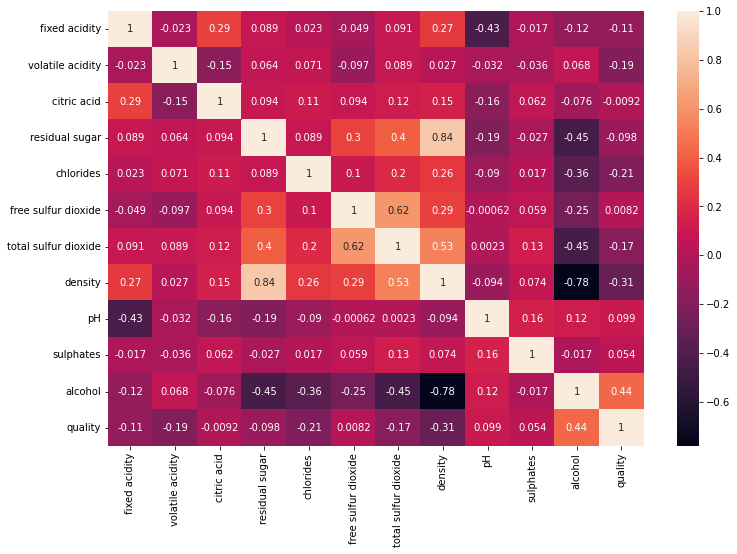

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(), annot = True)

In [93]:
X = df.drop('quality', axis = 1)
y = df['quality']
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.3, random_state=17)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_holdout_scaled = scaler.transform(X_holdout)

# Linear Regression

In [94]:
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [95]:
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, linreg.predict(X_train_scaled)))
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, linreg.predict(X_holdout_scaled)))

Mean squared error (train): 0.558
Mean squared error (test): 0.584


In [97]:
linreg_coef = pd.DataFrame({'coef': linreg.coef_, 'coef_abs': np.abs(linreg.coef_)},
                          index=df.columns.drop('quality'))
linreg_coef.sort_values(by='coef_abs', ascending=False)

,coef,coef_abs
density,-0.665720,0.665720
residual sugar,0.538164,0.538164
volatile acidity,-0.192260,0.192260
pH,0.150036,0.150036
alcohol,0.129533,0.129533
fixed acidity,0.097822,0.097822
sulphates,0.062053,0.062053
free sulfur dioxide,0.042180,0.042180
total sulfur dioxide,0.014304,0.014304
chlorides,0.008127,0.008127


In [98]:
from sklearn.feature_selection import SelectPercentile
select =  SelectPercentile(percentile = 80)
X_train_select = select.fit_transform(X_train, y_train)
X_holdout_select = select.transform(X_holdout)

In [99]:
linreg2 = LinearRegression()
linreg2.fit(X_train_secelt, y_train)

LinearRegression()

In [100]:
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, linreg2.predict(X_train_select)))
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, linreg2.predict(X_holdout_select)))

Mean squared error (train): 0.570
Mean squared error (test): 0.579


In [101]:
X_train_log = np.log(X_train+1)
X_holdout_log = np.log(X_holdout+1)

In [102]:
linreg3 = LinearRegression()
linreg3.fit(X_train_log, y_train)
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, linreg3.predict(X_train_log)))
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, linreg3.predict(X_holdout_log)))


Mean squared error (train): 0.554
Mean squared error (test): 0.574


In [103]:
linreg_coef1 = pd.DataFrame({'coef': linreg3.coef_, 'coef_abs': np.abs(linreg3.coef_)},
                          index=df.columns.drop('quality'))
linreg_coef1.sort_values(by='coef_abs', ascending=False)

,coef,coef_abs
density,-240.235888,240.235888
volatile acidity,-2.492553,2.492553
alcohol,2.469422,2.469422
pH,2.458260,2.458260
sulphates,0.642437,0.642437
chlorides,-0.538028,0.538028
residual sugar,0.444409,0.444409
fixed acidity,0.324435,0.324435
free sulfur dioxide,0.247711,0.247711
total sulfur dioxide,-0.072964,0.072964


In [104]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_holdout_poly = poly.transform(X_holdout)
print(X_train_poly.shape, X_train.shape)

(3428, 77) (3428, 11)


In [105]:
linreg4 = LinearRegression()
linreg4.fit(X_train_poly, y_train)
print("Mean squared error (train): %.3f" % mean_squared_error(y_train, linreg4.predict(X_train_poly)))
print("Mean squared error (test): %.3f" % mean_squared_error(y_holdout, linreg4.predict(X_holdout_poly)))

Mean squared error (train): 0.492
Mean squared error (test): 0.519


# Lasso

In [10]:
lasso1 = Lasso(alpha= 0.01,  random_state=17)
lasso1.fit(X_train_scaled, y_train)
lasso1_coef = pd.DataFrame({'coef': lasso1.coef_, 'abs_coef': np.abs(lasso1.coef_)}, index=df.columns.drop('quality'))
lasso1_coef.sort_values(by = 'abs_coef', ascending=False)

,coef,abs_coef
alcohol,0.322425,0.322425
residual sugar,0.256363,0.256363
density,-0.235492,0.235492
volatile acidity,-0.188479,0.188479
pH,0.067277,0.067277
free sulfur dioxide,0.043088,0.043088
sulphates,0.029722,0.029722
chlorides,-0.002747,0.002747
fixed acidity,-0.000000,0.000000
citric acid,-0.000000,0.000000


In [11]:
alphas = np.logspace(-6, 2, 200)
lasso_cv = LassoCV(cv = 5, random_state=17, alphas = alphas)
lasso_cv.fit(X_train_scaled, y_train)
lasso_cv.alpha_

0.0002833096101839324

In [13]:
lasso1 = Lasso(alpha= 0.0002833096101839324,  random_state=17)
lasso1.fit(X_train_scaled, y_train)
lasso1_coef = pd.DataFrame({'coef': lasso1.coef_, 'abs_coef': np.abs(lasso1.coef_)}, index=df.columns.drop('quality'))
lasso1_coef.sort_values(by = 'abs_coef', ascending=False)

,coef,abs_coef
density,-0.648161,0.648161
residual sugar,0.526883,0.526883
volatile acidity,-0.192049,0.192049
pH,0.146549,0.146549
alcohol,0.137115,0.137115
fixed acidity,0.093295,0.093295
sulphates,0.060939,0.060939
free sulfur dioxide,0.042698,0.042698
total sulfur dioxide,0.012969,0.012969
chlorides,0.006933,0.006933


In [14]:
print(f"Mean squared error {mean_squared_error(y_train, lasso1.predict(X_train_scaled))}")
print(f"Mean squared error {mean_squared_error(y_holdout, lasso1.predict(X_holdout_scaled))}")

Mean squared error 0.558070014187378
Mean squared error 0.5832976077860635


# RandomForestRegressor

In [15]:
forest = RandomForestRegressor(random_state=17)
forest.fit(X_train_scaled, y_train)
print(f"Mean squared error {mean_squared_error(y_train, forest.predict(X_train_scaled))}")
print(f"Mean squared error {cross_val_score(forest,X_train_scaled, y_train, scoring='neg_mean_squared_error')}")
print(f"Mean squared error {mean_squared_error(y_holdout, forest.predict(X_holdout_scaled))}")

Mean squared error 0.05261155192532089
Mean squared error [-0.45572741 -0.40453892 -0.39255539 -0.41715766 -0.40102248]
Mean squared error 0.37163775510204083


In [16]:
forest2 = RandomForestRegressor(max_depth=19, max_features=7, min_samples_leaf=1, random_state=17).fit(X_train_scaled, y_train)

In [23]:
print(f"Mean squared error {mean_squared_error(y_holdout, forest2.predict(X_holdout_scaled))}")
print(f"Mean squared error {np.mean(cross_val_score(forest2,X_train_scaled, y_train, scoring='neg_mean_squared_error'))}")

Mean squared error 0.36977544441894966
Mean squared error -0.40387601412916696


In [24]:
forest2.feature_importances_

array([0.06187278, 0.11762658, 0.06149953, 0.07252901, 0.067819  ,
       0.11350911, 0.07164415, 0.08653019, 0.07264572, 0.0594988 ,
       0.21482513])

In [25]:
rf_importance = pd.DataFrame({'feature':X.columns, 'coef':forest2.feature_importances_})
rf_importance.sort_values(by = 'coef', ascending=False)

,feature,coef
10,alcohol,0.214825
1,volatile acidity,0.117627
5,free sulfur dioxide,0.113509
7,density,0.086530
8,pH,0.072646
3,residual sugar,0.072529
6,total sulfur dioxide,0.071644
4,chlorides,0.067819
0,fixed acidity,0.061873
2,citric acid,0.061500
